## IMPORTANDO
Para iniciar os trabalhos, foi necessário a utilização das bibliotecas xml.etree.ElementTree, requests, pandas, matplotlib e sqlite3.

In [ ]:

import xml.etree.ElementTree as ET
import requests
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

## TRATAMENTO INICIAL
A primeira etapa foi importar o arquivo xml utilizando xml.etree e o requests


In [ ]:
# IMPORTA ARQUIVO XML
url = "hhttps://autenticador.secullum.com.br/Token"
header = { 'Accept': 'application/xml' }
r = requests.get(url, headers=header)

tree =  ET.ElementTree(ET.fromstring(r.content))    
root = tree.getroot()

# LISTA DAS ESTAÇÕES DOS ESTADOS
codigos = ['SBRJ','SBSP','SBVT', 'SBCF']
cidades = ['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte']
dc_cid_cod ={}

# SALVA AS ESTAÇÕES
for k,j in zip(codigos, cidades):
  dc_cid_cod[k] = j
print(dc_cid_cod)

# for i in range(0,len(list(root))):
#   print(i)
codigos = ['SBRJ','SBSP','SBVT', 'SBCF']
for x in range(len(codigos)):
    print(codigos[x])

{'SBRJ': 'Rio de Janeiro', 'SBSP': 'São Paulo', 'SBVT': 'Vitória', 'SBCF': 'Belo Horizonte'}
SBRJ
SBSP
SBVT
SBCF


In [ ]:
def convertendo(root):
      codigos = ['SBRJ','SBSP','SBVT', 'SBCF']
      cols = ['codigo', 'atualizacao', 'temperatura', 'tempo_desc']
      rows = []
      for i in root:
        codigo = i.find('codigo').text # STRING
        codigo = str(codigo)
        
        for x in range(0,len(codigos)):     
            if codigo == codigos[i]:
                print(codigos[i])
          
            
	# 			codigo_certo = cidades[i] #dc_cid_cod[root[i][0].text]
	# 			atualizacao = i.find('atualizacao').text
	# 			temperatura = i.find('temperatura').text
	# 			tempo_desc = i.find('tempo_desc').text
	# 			if tempo_desc == errado_predominio[0]:
					
	# 				predominio_certo = 'Sol Predominante'
	# 				rows.append(
	# 					{'codigo': codigo_certo, 'atualizacao': atualizacao, 'temperatura': temperatura, 'tempo_desc':
	# 						predominio_certo})
				
	# 			elif tempo_desc == errado_predominio[1]:
	# 				predominio_certo = 'Chuvas Casuais'
	# 				rows.append(
	# 					{'codigo': codigo_certo, 'atualizacao': atualizacao, 'temperatura': temperatura, 'tempo_desc':
	# 						predominio_certo})
	# 			else:
	# 				predominio_certo = 'Sol Predominante'
	# 				rows.append(
	# 					{'codigo': codigo_certo, 'atualizacao': atualizacao, 'temperatura': temperatura, 'tempo_desc':
	# 						tempo_desc})

	# return pd.DataFrame(rows, columns=cols)
 
convertendo(root)

TypeError: ignored

## SALVANDO
Criando o banco de dados, são salvas as informações relaciondas com:

1.   Código da estação;
2.   Atualização
3.   Temperatura
4.   Umidade do Ar

In [ ]:
conexao = sqlite3.connect('basededados.db')
cursor = conexao.cursor()

cursor.execute('CREATE TABLE IF NOT EXISTS previsao_tempo ('
                'id INTEGER PRIMARY KEY AUTOINCREMENT,'
                'codigo TEXT,'
                'atualizacao TEXT,'
                'temperatura INTEGER,'
                'ar_umido INTEGER,'
                'a_tempo TEXT'
                ')')
teste ={} # Salva um dicionário teste com temperatura e estação.
predominio=[] # Salva o predominio do momento.
errado_predominio = ['PredomÃ\xadnio de Sol','Chuvas periÃ³dicas'] # predominio errado

for i  in range(0, 26):
  if root[i][0].text in codigos:
    teste[root[i][0].text] = root[i][3].text
    
    if root[i][5].text == errado_predominio[0]:
      predominio.append(root[i][5].text)   
      predominio_certo = 'Sol Predominante'
      cursor.execute('INSERT INTO previsao_tempo (codigo, atualizacao, temperatura, ar_umido, a_tempo) VALUES (?, ?, ?, ?, ?)', (dc_cid_cod[root[i][0].text],root[i][1].text,root[i][3].text,root[i][6].text,predominio_certo))
    elif root[i][5].text == errado_predominio[1]:
      predominio.append(root[i][5].text)   
      predominio_certo = 'Chuvas Casuais'
      cursor.execute('INSERT INTO previsao_tempo (codigo, atualizacao, temperatura, ar_umido, a_tempo) VALUES (?, ?, ?, ?, ?)', (dc_cid_cod[root[i][0].text],root[i][1].text,root[i][3].text,root[i][6].text,predominio_certo))
    else:    
      predominio.append(root[i][5].text)          
      cursor.execute('INSERT INTO previsao_tempo (codigo, atualizacao, temperatura, ar_umido, a_tempo) VALUES (?, ?, ?, ?, ?)', (dc_cid_cod[root[i][0].text],root[i][1].text,root[i][3].text,root[i][6].text, root[i][5].text))
    # print(f' Na estação {dc_cid_cod[root[i][0].text]} está fazendo {root[i][3].text} graus')  -- > É um teste para verificar se está funcionando o código
conexao.commit()
# PARA VER COMO ESTÁ SENDO SALVO 
cursor.execute('SELECT * FROM previsao_tempo')
for linha in cursor.fetchall():
    print(linha)
cursor.close()
conexao.close()

(1, 'Belo Horizonte', '09/10/2021 13:00:00', 27, 51, 'Sol Predominante')
(2, 'Rio de Janeiro', '09/10/2021 13:00:00', 22, 78, 'Sol Predominante')
(3, 'São Paulo', '09/10/2021 13:00:00', 17, 88, 'Sol Predominante')
(4, 'Vitória', '09/10/2021 13:00:00', 21, 83, 'Chuvas Casuais')


In [ ]:
# CORRIGE ACENTO DO PREDOMINIO
for x in range(0, len(predominio)):  
    predominio[x] = predominio[x].replace('Ã\xad', 'í')

## REPRESENTAÇÃO
Primeiro: apresentação de tabela com a temperatura e o predomínio do clima,
Segundo: apresentação de tabela para indicar a temperatura.

In [ ]:
# CRIA O TABELA COM A TEMPERATURA 
estacao = list(teste)
temperatura = list(teste.values())
d = {'Estacao': estacao, 'Temperatura': temperatura, 'Predominio': predominio}
df = pd.DataFrame(data=d)

df['Temperatura'] = pd.to_numeric(df['Temperatura']) # Converte para Integer
df


,Estacao,Temperatura,Predominio
0,SBCF,24,Predomínio de Sol
1,SBRJ,20,Predomínio de Sol
2,SBSP,19,Predomínio de Sol
3,SBVT,22,Chuvas periÃ³dicas


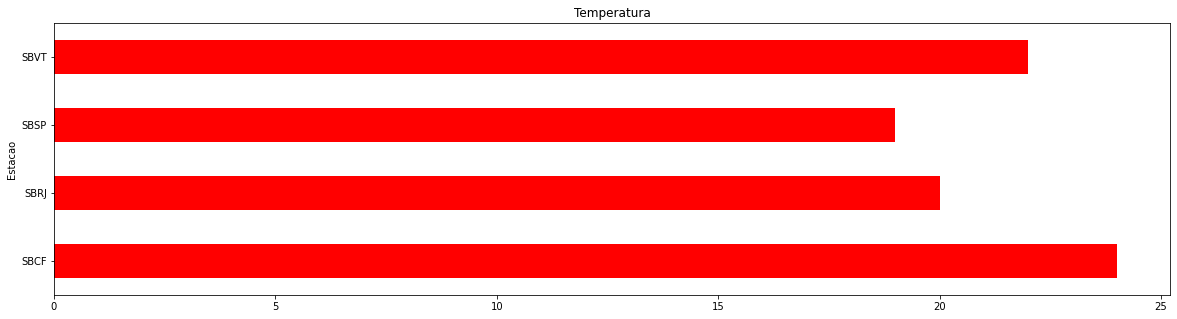

In [ ]:
# CRIA GRAFICO COM A TEMPERATURA ATUAL
df.groupby(df['Estacao'])['Temperatura'].sum().plot.barh(title  = 'Temperatura', color ='red', figsize=(20,5));

## RECUPERAÇÃO
Transforma os banco de dados em um arquivo CSV
Recupera o arquivo CSV para tratamento de dados

In [ ]:
#RECUPERAÇÃO DE DADOS - SALVA EM CSV
conect = sqlite3.connect('/content/basededados.db')

dados_recuperados = pd.read_sql_query("SELECT * FROM previsao_tempo", conect)
dados_recuperados.to_csv('dados.csv',index=False)

In [ ]:
# IMPORTA O CSV 
x = '/content/dados.csv'

dff = pd.read_csv(x, encoding= 'unicode_escape', error_bad_lines=False,sep=',')

In [ ]:
dff['atualizacao'] = pd.to_datetime(dff['atualizacao']) # TRANSFORMA EM DATA
dff

In [ ]:
dff.nlargest(3, "temperatura")



,id,codigo,atualizacao,temperatura,ar_umido,a_tempo
1,2,Rio de Janeiro,2021-08-10 21:00:00,21,70,PredomÃÂ­nio de Sol
3,4,VitÃ³ria,2021-08-10 21:00:00,21,75,PredomÃÂ­nio de Sol
5,6,Rio de Janeiro,2021-08-10 21:00:00,21,70,PredomÃÂ­nio de Sol


In [ ]:
""" ANOTAÇÕES DE ESTUDO"""


# TESTE DE VERIFICAÇÃO UM
# teste ={}
# for i  in range(0, 26):
#   if root[i][0].text in códigos:
#     teste[root[i][0].text] = root[i][3].text
#     print(f' Na estação {root[i][0].text} está fazendo {root[i][3].text} graus')  


# print(root[0][0].text) 

#VISUALIZA_RAIZ
#print(root.attrib)

# #ESTUDO_VISUALIZAR_METAR ___TESTE DE INTEGRAÇÃO
# for child in root:
#   for codigo in child:
#     #for valor in codigo:
#       print(codigo.text)
#     #print(codigo.tag, codigo.attrib)
#     # print(child.tag, child.attrib)


# # VERIFICAÇÃO LÓGICA --- TESTE DE VERIFICAÇÃO
# for child in root.findall("metar"):
#     for title in child.findall("codigo"):
#       if title.text in códigos:        
#         print(title.text)


# print(root[0][0].text)  acessa o primeiro item do xml